### Test de IF amélioré  - EIF - Extended Isolation Forest

In [12]:
pip install eif


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

gp2_carburant = pd.read_csv("/Users/abdelwahed/Mise-en-place-d'un-détécteur-de-fraude-de-carburant/gp2_carburant_transformed_diff_date.csv",delimiter=',',encoding='utf-8')
gp2_carburant.head()

,matricule,date,quantite,fournisseur,typePaiement,type_carburant,station,diff_date
0,101,2023-06-01,36.78,0,1407043939,2,109,0.0
1,101,2023-06-06,67.51,0,1407043939,2,100,5.0
2,101,2023-06-07,30.23,0,1407043939,2,109,1.0
3,101,2023-06-09,8.56,0,1407043939,2,104,2.0
4,101,2023-06-09,51.89,0,1407043939,2,104,0.0


In [20]:
#gp2_carburant = gp2_carburant[gp2_carburant['matricule'] == 230]
gp2_carburant1 = gp2_carburant[gp2_carburant['matricule'] == 230]
#print(gp2_carburant)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from eif import iForest  # Importer la classe iForest depuis le package eif
import joblib

def train_isolation_forest_model(mat_dataset):
    
    data = mat_dataset[['matricule','quantite','type_carburant','typePaiement','fournisseur','diff_date']]

    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(data)

    #data = pd.DataFrame(np_scaled)

    # Isolation forest model
    outliers_fraction = 0.3
    iforest = iForest(data.to_numpy(), ntrees=10, sample_size=10, ExtensionLevel=2)
    
    # Obtenez les scores d'anomalie pour vos données
    anomaly_scores = iforest.compute_paths(X_in = data.to_numpy())
    
    # Définir un seuil pour déterminer ce qui est considéré comme une anomalie
    seuil_anomalie = 0.4 #vous pouvez ajuster ce seuil en fonction de vos besoins

    # Identifier les indices des points qui sont considérés comme des anomalies
    indices_anomalies = [i for i, score in enumerate(anomaly_scores) if score > seuil_anomalie]
    indices_normales = [i for i, score in enumerate(anomaly_scores) if score <= seuil_anomalie]
    
    # Afficher les données correspondant aux anomalies
    anomalies = mat_dataset.iloc[indices_anomalies]
    normamles = mat_dataset.iloc[indices_normales]

    anomalies['class_anomaly']  = -1
    normamles['class_anomaly']  = 1
    new_data = pd.concat([normamles, anomalies], ignore_index=True)
    print(new_data)
    
    return new_data, iforest

In [23]:
#récuperer la liste des matricules
matricules = gp2_carburant['matricule'].unique()
len(matricules)

75

In [6]:
eif_final = pd.DataFrame()
print(eif_final)
#m = None
for mat in matricules :
    print('boucle for okay ...')
    data_per_mat = gp2_carburant[gp2_carburant['matricule'] == mat]
    print('data_per_mat okay ...')
    print(data_per_mat)

    #eif_dataset,m = train_isolation_forest_model(data_per_mat)
    print('eif_dataset okay ...')

    #eif_final = pd.concat([eif_final, eif_dataset], ignore_index = True)
    #
#print(mat)
#print(m)    
#print(if_final.shape)

Empty DataFrame
Columns: []
Index: []
boucle for okay ...
data_per_mat okay ...
    matricule        date  quantite  fournisseur  typePaiement  \
0         101  2023-06-01     36.78            0    1407043939   
1         101  2023-06-06     67.51            0    1407043939   
2         101  2023-06-07     30.23            0    1407043939   
3         101  2023-06-09      8.56            0    1407043939   
4         101  2023-06-09     51.89            0    1407043939   
5         101  2023-06-14     62.97            0    1407043939   
6         101  2023-06-15     39.29            0    1407043939   
7         101  2023-06-20     55.42            0    1407043939   
8         101  2023-06-21     37.78            0    1407043939   
9         101  2023-07-12     30.23            0    1407043939   
10        101  2023-07-12     46.85            0    1407043939   
11        101  2023-07-13     51.47            0    1407043939   
12        101  2023-07-18     40.30            0    1407043939

In [1]:
#import numpy as np

#ss1=np.argsort(anomaly_scores)
#print(ss1)

In [2]:
#gp2_carburant['eif'] = anomaly_scores

In [25]:
import matplotlib.pyplot as plt

In [39]:
data_per_mat = gp2_carburant[gp2_carburant['matricule'] == 932]   
eif_dataset,m = train_isolation_forest_model(data_per_mat)
eif_dataset = eif_dataset.sort_values(by=["matricule", "date"])

print(eif_dataset.head(10))

    matricule        date  quantite  fournisseur  typePaiement  \
0         932  2023-06-23     30.89            0    1407022663   
1         932  2023-07-08     30.10            0    1407022663   
2         932  2023-07-13     29.70            0    1407022663   
3         932  2023-07-19     29.70            0    1407022663   
4         932  2023-08-15     29.70            0    1407022663   
5         932  2023-08-22     31.68            0    1407022663   
6         932  2023-08-28     31.29            0    1407022663   
7         932  2023-09-03     30.10            0    1407022663   
8         932  2023-09-19     29.70            0    1407022663   
9         932  2023-10-03     29.70            0    1407022663   
10        932  2023-10-07     29.70            0    1407022663   
11        932  2023-10-12     29.70            0    1407022663   
12        932  2023-10-24     29.70            0    1407022663   
13        932  2024-02-20     29.70            0    1407022663   
14        

/var/folders/sn/59b9cwm95v14m9wvpx_jfkxc0000gn/T/ipykernel_18583/124660982.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['class_anomaly']  = -1
/var/folders/sn/59b9cwm95v14m9wvpx_jfkxc0000gn/T/ipykernel_18583/124660982.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normamles['class_anomaly']  = 1


In [40]:
anomalies = eif_dataset[eif_dataset['class_anomaly'] == -1]

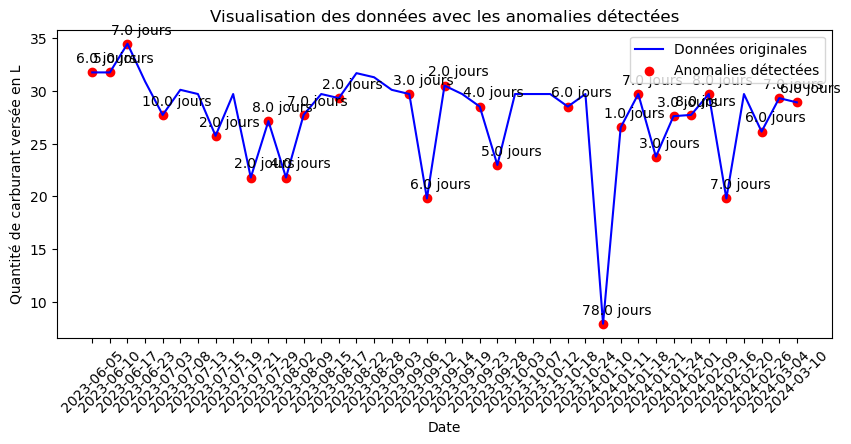

In [41]:
# Afficher les résultats
fig, ax = plt.subplots(figsize = (10, 4))
plt.plot(data_per_mat['date'], data_per_mat['quantite'], label='Données originales', color='blue')

plt.scatter(anomalies['date'], anomalies['quantite'], color='red', label='Anomalies détectées', marker='o')

for index, row in anomalies.iterrows():
     plt.annotate((str(row['diff_date']) + ' jours'), (row['date'], row['quantite']), textcoords="offset points", xytext=(10,7), ha='center', fontsize=10,
                  )

plt.xlabel('Date')
plt.ylabel('Quantité de carburant versée en L')
plt.title('Visualisation des données avec les anomalies détectées')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Evaluation de EIF 

In [44]:
from sklearn.metrics import silhouette_score

# Calcul de la métrique silhouette
eif_dataset = eif_dataset.drop(['date'],axis = 1)

silhouette_avg = silhouette_score(eif_dataset, eif_dataset['class_anomaly'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.01532464838675059


In [ ]:
min(0.16,-0.003)

In [45]:
import numpy as np

# Calcul de la stabilité en utilisant les prédictions de l'Isolation Forest
def compute_stability(predictions, num_runs=10):
    n_samples = len(predictions)
    stability_scores = []
    for _ in range(num_runs):
        random_predictions = np.random.choice(predictions, n_samples, replace=False)
        stability_score = np.mean(predictions == random_predictions)
        stability_scores.append(stability_score)
    return np.mean(stability_scores)


In [46]:
# Supposons que anomaly_predictions sont les prédictions de votre modèle Isolation Forest
stability_score = compute_stability(eif_dataset['class_anomaly'])
print("Stability Score:", stability_score)

Stability Score: 0.5219512195121953


* Stabilité élevée : Une stabilité proche de 1 indique que les prédictions du modèle sont très cohérentes à travers différents échantillons de données. Cela suggère que le modèle est robuste et que ses décisions sont fiables même en présence de variations dans les données.


* Stabilité faible : Une stabilité proche de 0 ou inférieure indique que les prédictions du modèle varient considérablement entre différents échantillons de données. Cela peut indiquer une sensibilité excessive aux variations dans les données ou des performances médiocres du modèle.

### Test sur de nouvelles données

In [53]:
transactions = pd.DataFrame({
    'matricule': [932, 932, 932],
    'quantite': [28.91, 31.0,33.1],
    'type_carburant': [0,0,0],
    'fournisseur': [0,0,0],
    'typePaiement': [1407022663,1407022663,1407022663],
    'diff_date': [6.0,5.0,6.0]  # Différence de date en jours
})


In [54]:
anomaly_scores1 = m.compute_paths(X_in = transactions.to_numpy())

In [55]:
# Identifier les indices des points qui sont considérés comme des anomalies
seuil_anomalie = 0.4

indices_anomalies1 = [i for i, score in enumerate(anomaly_scores1) if score > seuil_anomalie]
indices_normales1 = [i for i, score in enumerate(anomaly_scores1) if score <= seuil_anomalie]

# Afficher les données correspondant aux anomalies
anomalies1 = transactions.iloc[indices_anomalies1]
normamles1 = transactions.iloc[indices_normales1]


anomalies1['class_anomaly1']  = -1
normamles1['class_anomaly1']  = 1

# Afficher les anomalies
print("Les anomalies sont :")
print(anomalies1)

Les anomalies sont :
   matricule  quantite  type_carburant  fournisseur  typePaiement  diff_date  \
0        932     28.91               0            0    1407022663        6.0   
1        932     31.00               0            0    1407022663        5.0   
2        932     33.10               0            0    1407022663        6.0   

   class_anomaly1  
0              -1  
1              -1  
2              -1  


In [ ]:
from sklearn.model_selection import cross_val_score

def train_isolation_forest_model(mat_dataset):
    
    data = mat_dataset[['matricule','quantite','type_carburant','typePaiement','fournisseur','diff_date']]

    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(data)

    data = pd.DataFrame(np_scaled)

    # Créer une instance de iForest avec les paramètres désirés
    iforest = iso.iForest(gp2_carburant.to_numpy(), ntrees=100, sample_size=10, ExtensionLevel=2)

    # Entraîner le modèle sur vos données
    #iforest.fit(gp2_carburant)

    # Obtenez les scores d'anomalie pour vos données
    anomaly_scores = iforest.compute_paths(X_in = gp2_carburant.to_numpy())
    mat_dataset['anomaly_if'] = ifo_model.predict(data)
    return mat_dataset,ifo_model


In [ ]:
if_final = pd.DataFrame()
print(if_final)
m = 0 
for mat in matricules :
    
    data_per_mat = dataframe[dataframe['matricule'] == mat]
    
    if_dataset,m = train_isolation_forest_model(data_per_mat)
    if_final = pd.concat([if_final, if_dataset], ignore_index = True)
    
print(mat)
print(m)    
print(if_final.shape)


In [ ]:
from sklearn.metrics import v_measure_score


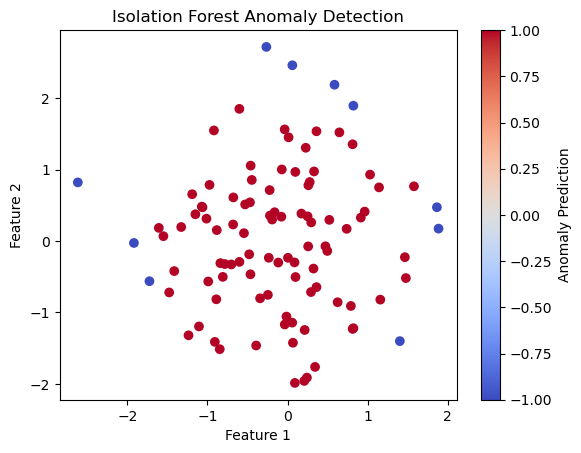

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

# Générer des données de démonstration (remplacez cela par vos propres données)
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 échantillons, 2 caractéristiques

# Créer et ajuster le modèle Isolation Forest
iforest = IsolationForest(contamination=0.1)  # Utilisation d'une contamination de 10% comme exemple
iforest.fit(X)

# Prédire les anomalies (1 pour normal, -1 pour anomalie)
anomaly_preds = iforest.predict(X)

# Tracer le nuage de points avec coloration par prédiction d'anomalie
plt.scatter(X[:, 0], X[:, 1], c=anomaly_preds, cmap='coolwarm')
plt.colorbar(label='Anomaly Prediction')  # Légende de la couleur
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
pip install h2o

In [ ]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

# Import the prostate dataset
h2o_df = h2o.import_file("https://raw.github.com/h2oai/h2o/master/smalldata/logreg/prostate.csv")

# Set the predictors
predictors = ["AGE","RACE","DPROS","DCAPS","PSA","VOL","GLEASON"]

# Define an Extended Isolation forest model
eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = len(predictors) - 1)

# Train Extended Isolation Forest
eif.train(x = predictors,
          training_frame = h2o_df)

# Calculate score
eif_result = eif.predict(h2o_df)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"]

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"]

In [ ]:
anomaly_score

In [ ]:
pip install deepod 

In [52]:
from deepod.models import DeepSVDD

# training an anomaly detection model
model = DeepSVDD() # or any other models in DeepOD
model.fit(gp2_carburant) # training

#path = 'save_file.pkl'
#model.save_model(path) # save trained model at the assigned path

# directly load trained model from path
#model = DeepSVDD.load_model(path)
model.decision_function(gp2_carburant)
# or
model.predict(gp2_carburant)

Start Training...
ensemble size: 1


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
#! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117